<a href="https://colab.research.google.com/github/AmoguJUduka/MachineLearning/blob/main/PersonalProjects/Classification/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
# Importing to_categorical from the correct location:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [3]:
X_train[0].shape

(28, 28)

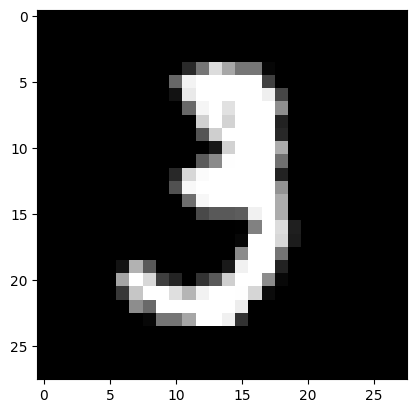

In [4]:
plt.imshow(X_train[10], cmap='gray')

In [5]:
y_train[2]

4

## Preprocessing the image data

In [6]:
image_height, image_width = 28, 28

In [7]:
X_train = X_train.reshape(60000, image_height * image_width)
X_test = X_test.reshape(10000, image_height * image_width)

In [8]:
X_train.shape

(60000, 784)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
X_train /= 255
X_test /= 255

## Build a model

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [15]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.9068 - loss: 0.3132 - val_accuracy: 0.9722 - val_loss: 0.0841
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9747 - loss: 0.0802 - val_accuracy: 0.9754 - val_loss: 0.0788
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - accuracy: 0.9826 - loss: 0.0534 - val_accuracy: 0.9799 - val_loss: 0.0759
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9884 - loss: 0.0365 - val_accuracy: 0.9777 - val_loss: 0.0752
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9898 - loss: 0.0318 - val_accuracy: 0.9807 - val_loss: 0.0771
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9922 - loss: 0.0260 - val_accuracy: 0.9797 - val_loss: 0.0756
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9927 - loss: 0.0214 - val_accuracy: 0.9783 - val_loss: 0.0908
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9936 -

### Plot the accuracy of the training model

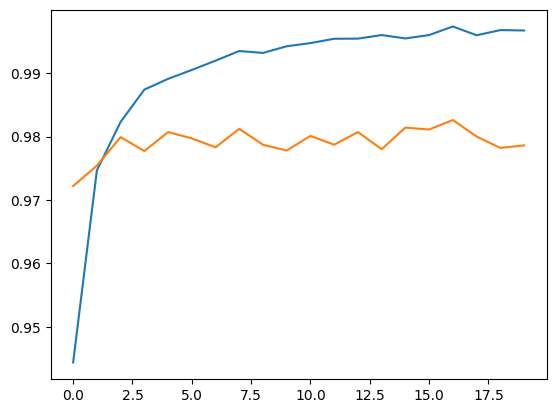

In [16]:
plt.plot(history.history['accuracy'])
# Change 'validation_accuracy' to 'val_accuracy'
plt.plot(history.history['val_accuracy'])
plt.show()

### Plot the accuracy of training and validation set

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
#print('Test accuracy:', accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9747 - loss: 0.1849


### Accuracy of training and validation with loss

## Run a prediction

# Convolution Neural Network

## Import the libraries

In [18]:
import tensorflow as tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Load the data

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [21]:
batch_size = 128
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)


In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [23]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 51ms/step - accuracy: 0.8969 - loss: 0.3450 - val_accuracy: 0.9850 - val_loss: 0.0473
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.9843 - loss: 0.0509 - val_accuracy: 0.9859 - val_loss: 0.0436
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 54ms/step - accuracy: 0.9905 - loss: 0.0307 - val_accuracy: 0.9921 - val_loss: 0.0259
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 53ms/step - accuracy: 0.9927 - loss: 0.0228 - val_accuracy: 0.9937 - val_loss: 0.0196
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 160s 63ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accuracy: 0.9953 - val_loss: 0.0146
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 51ms/step - accuracy: 0.9950 - loss: 0.0157 - val_accuracy: 0.9974 - val_loss: 0.0088
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 52ms/step - accuracy: 0.9963 - loss: 0.0110 - val_accuracy: 0.9968 - val_loss: 0.0097
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 149s 56ms/step - accuracy: 0.

Recall that when using neural networks we got good accuracy.

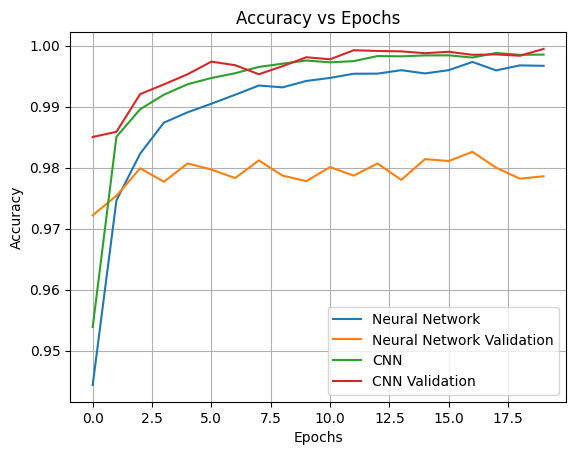

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.legend(['Neural Network', 'Neural Network Validation', 'CNN', 'CNN Validation'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.grid(True)
plt.show()


Comparing this to using CNNs - the performance is far superior.

In [26]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9892 - loss: 0.0514


Using VGG16